  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Vehicle Performance Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
The objective of the dataset is to predict performance of vehicle


## Data Definition:

Attribute Information:

1. Kilometer_per_liter: distance in kilometer traveled per liter
2. cylinders: No of cylinders
3. displacement: displacement
4. horsepower: Horsepower is a unit of measurement of power, or the rate at which work is done, usually in reference to the output of engines or motors
5. weight: Weight of car
6. acceleration: Acceleration of Car
7. model year: Model Year of the car
8. origin: Country origin
9. car name: Car brand and model name (unique for each instance)

1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Data Preprocessing](#Data_Preprocessing)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Checking for Missing Values](#Checking_for_Missing_Values)
    - 3.3 - [Data Correction](#Data_Correction)
    - 3.4 - [Statistical Summary](#Statistical_Summary)    
4. **[EDA](#EDA)**
    - 4.1 - [Univariate Analysis](#Univariate_Analysis)
    - 4.2 - [Multivariate Analysis](#Multivariate_Analysis)
    - 4.3 - [Covariance](#Covariance)
    - 4.4 - [Correlation](#Correlation)
5. **[Label Encoding of Categorical Data](#Label_Encoding_of_Categorical_Data)**
6. **[Standardise Data](#Standardise_Data)**
7. **[Linear Regression](#Linear_Regression)**
    - 7.1 - [Ordinary Least Square](#Ordinary_Least_Square)
    - 7.2 - [Linear Regression using SGD](#Linear_Regression_using_SGD)
8. **[Model Comparision](#model_cmp)** 
  

<a id='import_packages'></a>
## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()

<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
# read the data
raw_data = pd.read_csv(r"F:\ML\Vehicle Performance Prediction\Dataset\data.csv")

# print the first five rows of the data
raw_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [3]:
data = raw_data.copy(deep = True)

<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Data Correction<br> 
                        3. Study summary statistics<br> 
                        4. Check for missing values<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [4]:
# check the data types for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>From the above output, we see that 'horsepower' is categorical variables which is invalid
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
raw_data.shape

(398, 9)

**We see the dataframe has 9 columns and 398 observations**

<a id='Checking_for_Missing_Values'></a>
## 3.2 Checking for Missing Values

In [6]:
# get the count of missing values
missing_values = data.isnull().sum()

# print the count of missing values
print(missing_values)

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64


**There are no missing values in the dataset**

<a id='Data_Correction'></a>
## 3.3 Data Correction

In [7]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

**Horsepower an object and not a float, the values we saw above were clearly numbers Lets try converting the column using astype()**

Let's look at the unique elements of horsepower to look for discrepancies 

In [8]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>'?' in horsepower is a placeholder for missing values</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Removing '?' from horsepower**

In [9]:
data = data[data.horsepower != '?']

In [10]:
'?' in data.horsepower

False

In [11]:
data.shape

(392, 9)

In [12]:
data.horsepower = data.horsepower.astype('float')


In [13]:
data.dtypes


origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

**On to preparing the categorical features :**

* model_year is ordinal. So we simply stick to dtype int.
* origin is a true categorical. We need to one hot encode it later.
* name actually contains two useful bits of information: the cars manufacturer and the model. We split that into two new columns.

In [14]:
data_1 = data.copy(deep = True)

In [15]:
data_1.origin = data_1.origin.astype('object')

In [16]:
# split() with expand=True yields one column per list element
# we only split on the first space by setting n=1
data_1[["manufacturer", "model"]] = data_1["name"].str.split(" ", n=1, expand=True)
data_1.drop("name", axis=1, inplace=True)
data_1.head(1).T

,0
origin,1
cylinders,8
displacement,307.0
horsepower,130.0
weight,3504
acceleration,12.0
year,1970
Kilometer_per_liter,7.652587
manufacturer,chevrolet
model,chevelle malibu


In [17]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


**There are several errors in the manufacturers names. E.g. «vokswagen», «maxda» etc. We fix these by replacing the wrong entries. We also fix some synomyms like «vw».**

In [18]:
errors = {
         "vokswagen" : "volkswagen", 
         "vw" : "volkswagen", 
         "toyouta" : "toyota", 
         "mercedes-benz" : "mercedes", 
         "chevroelt": "chevrolet",
         "chevy" : "chevrolet", 
         "maxda" : "mazda"
         }

data_1.manufacturer = data_1.manufacturer.map(errors).fillna(data_1.manufacturer)

In [19]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


**Some model names also seem redundant or wrong.**

Hand checking would be way too time-consuming so we only improve this features brute-force by removing all special characters.

In [20]:
import re
def alphanumeric(x):
    return re.sub('[^A-Za-z0-9]+', '', (str(x)))

data_1["model"] = data_1.model.apply(lambda x: alphanumeric(x))

In [21]:
print(len(data_1.model.unique()))

293


**Now everything looks in order so let's describe the dataset**

<a id='Statistical_Summary'></a>
## 3.4 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> In our dataset we have numerical variables. Now we check for summary statistics of all the variables<br>
                        For numerical variables, we use .describe(). For categorical variables we use describe(include='object').
          <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# data frame with numerical features
data_1.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# data frame with categorical features
data_1.describe(include='object')

,origin,manufacturer,model
count,392,392,392
unique,3,30,293
top,1,ford,corolla
freq,245,48,5


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of the categorical variables i.e diagnosis(no.of levels in the variable), top(majority level) and the count of the majority level.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='EDA'></a>
## 4. EDA


**PDF's of features**

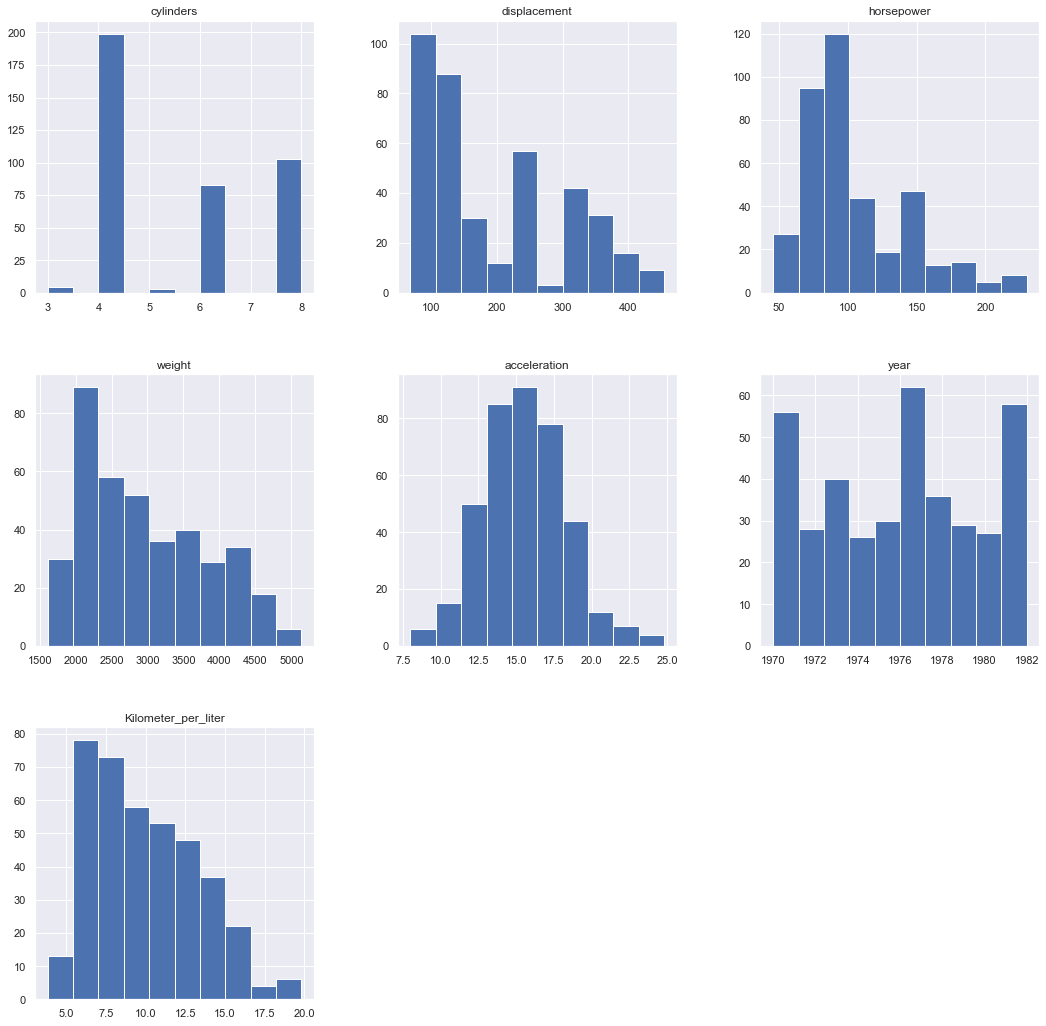

In [24]:
fig = data_1.hist(figsize = (18,18))


<a id='Univariate_Analysis'></a>
## 4.1 Univariate Analysis

**1. Kilometer_per_liter**

In [25]:
data_1.Kilometer_per_liter.describe()


count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

**So the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8**

c:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

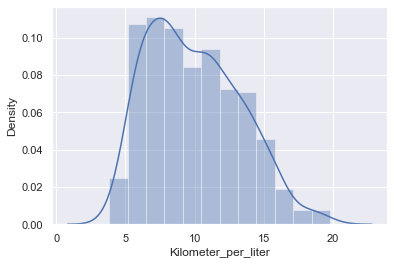

In [26]:
sns.distplot(data_1.Kilometer_per_liter)

We expect that our data points will be on red line for gaussian distributin. We see dist tails


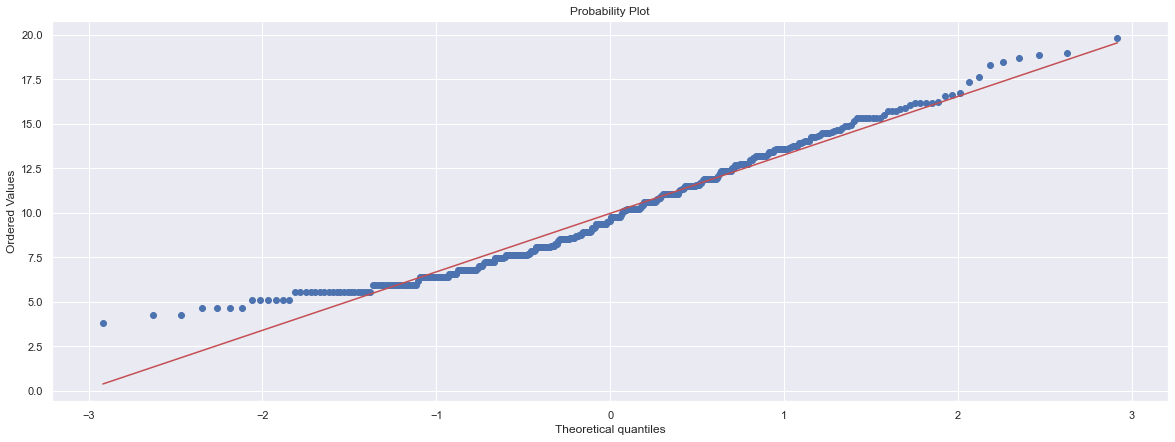

In [27]:
# qq plot:
plt.figure(figsize = (20,7))
stats.probplot(data["Kilometer_per_liter"],plot=plt)
plt.show
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")


In [28]:
print("Skewness: %f" % data['Kilometer_per_liter'].skew())
print("Kurtosis: %f" % data['Kilometer_per_liter'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


**We can see that Kilometer_per_liter is not normally distributed**

Log-Transformation

In [29]:
data_2 = data_1.copy(deep = True)

In [30]:
data_2['log_mileage'] = np.log(data_2.Kilometer_per_liter)

In [31]:
data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,log_mileage
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


c:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

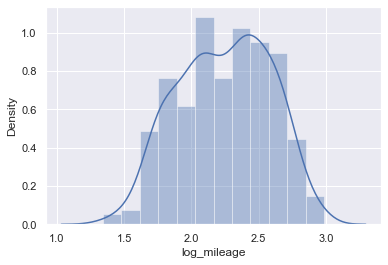

In [32]:
sns.distplot(data_2.log_mileage)

We expect that our data points will be on red line for gaussian distributin. We see dist tails


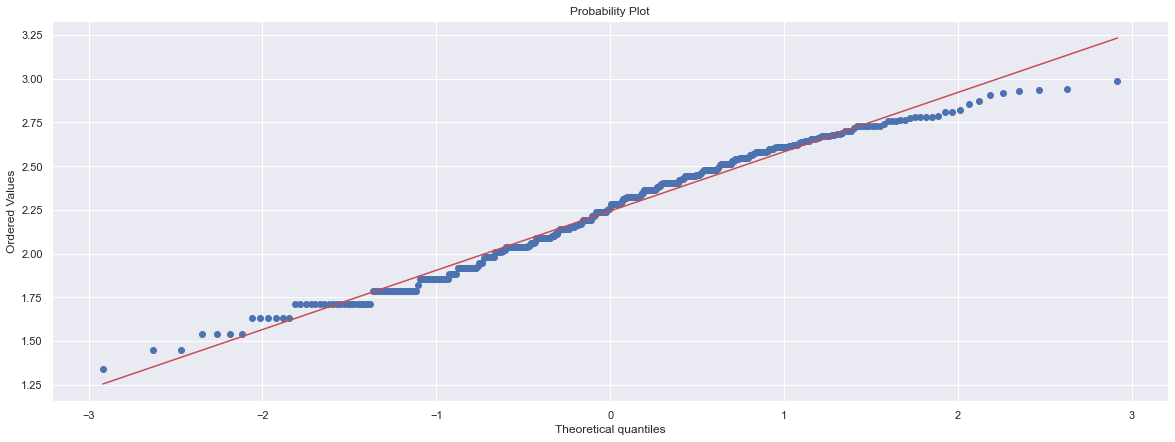

In [33]:
# qq plot:
plt.figure(figsize = (20,7))
stats.probplot(data_2.log_mileage,plot=plt)
plt.show
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>From above plots we can see that mileage is normally distributed</b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. Distribution of Displacement**

Engine displacement is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC).

In [34]:
data_2.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

**So the minimum value is 68 and maximum is 455, but on average it is 194.41 with a variation of 104.64**

c:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

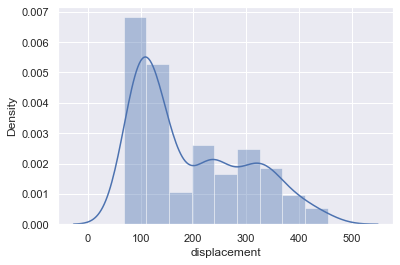

In [35]:
sns.distplot(data_2.displacement)

**3. Analysis of Cylinder**

c:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


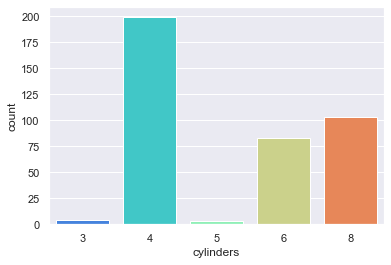

In [36]:
sns.countplot(data_2.cylinders,data=data_1,palette = "rainbow")
plt.show()

**From above Countplot**

* From the above above plot we can visualize that there are maximum number of 4 cylinder vehicles. 
* Around 98% of the vehicles are either of 4, 6, 8 cylinders and only small percent of vehicles are either of 3 and 5 cylinders.
* Cylinders is categorical, but in our dataset it is numerical.So changing type



In [37]:
data_3 = data_2.copy(deep = True)

In [38]:
data_3.cylinders = data_3.cylinders.astype('object')

In [39]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
 8   manufacturer         392 non-null    object 
 9   model                392 non-null    object 
 10  log_mileage          392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 44.9+ KB


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>From output we can see that cylinder attribute is now object</b>     </font>
            </div>
        </td>
    </tr>
</table>

**4. Analysis of model year**

c:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


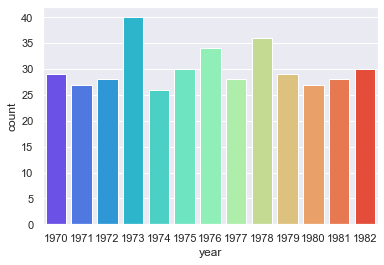

In [40]:
sns.countplot(data_3['year'],palette = "rainbow")
plt.show()

**Maximum number of vehicles are of the year 1973 and minumum number of the year 1974.**

**5. Analysis of Origin**

c:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


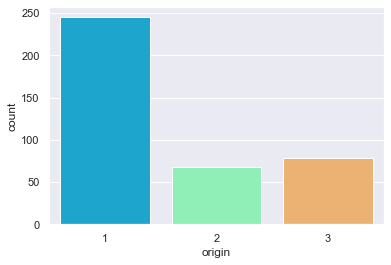

In [41]:
sns.countplot(data_3.origin,palette = "rainbow")
plt.show()

**Most of the vehicles are from region 1 as compared to the other two regions.**

**6. Analysis of Horsepower**

c:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

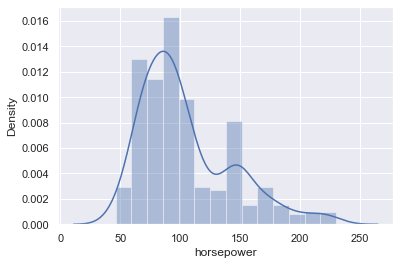

In [42]:
sns.distplot(data_3.horsepower)

**From above distribution**

* Horsepower rates the engine performance of cars
* We can visualize that most of the vehicles have around 75-110 horsepower 
* And only few vehicles have horsepoer above 200.

**7. Analysis of Manufacturer**

Cars from 30 manufacturers (Top10)
----------  --
ford        48
chevrolet   47
plymouth    31
dodge       28
amc         27
toyota      26
datsun      23
volkswagen  22
buick       17
pontiac     16
----------  --


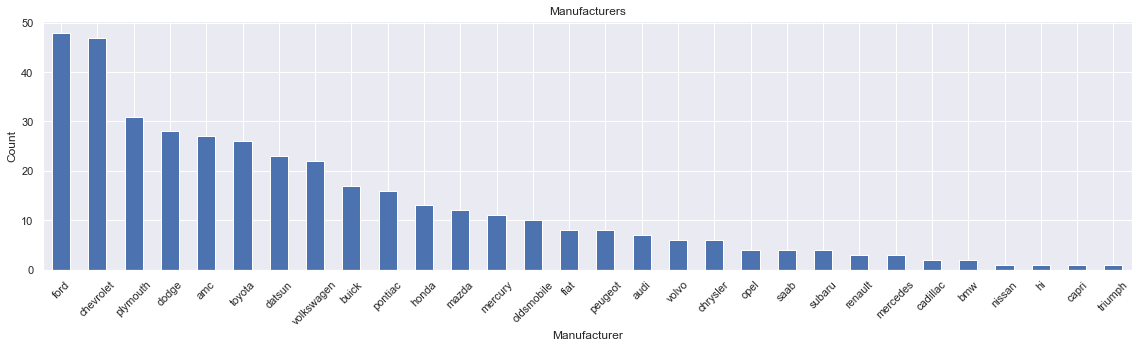

In [43]:
from tabulate import tabulate
print(f"Cars from {data_3.manufacturer.nunique()} manufacturers (Top10)")
print(tabulate(pd.DataFrame(data_3.manufacturer.value_counts()[:10])))

plt.figure(figsize=(16,5));
data_3.groupby("manufacturer")["manufacturer"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Manufacturers")
plt.ylabel("Count")
plt.xlabel("Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**8. Analysis of Model**

293 car models (Top 10)
--------  -
corolla   5
matador   5
pinto     5
rabbit    5
hornet    4
504       4
gremlin   4
impala    4
chevette  4
maverick  4
--------  -


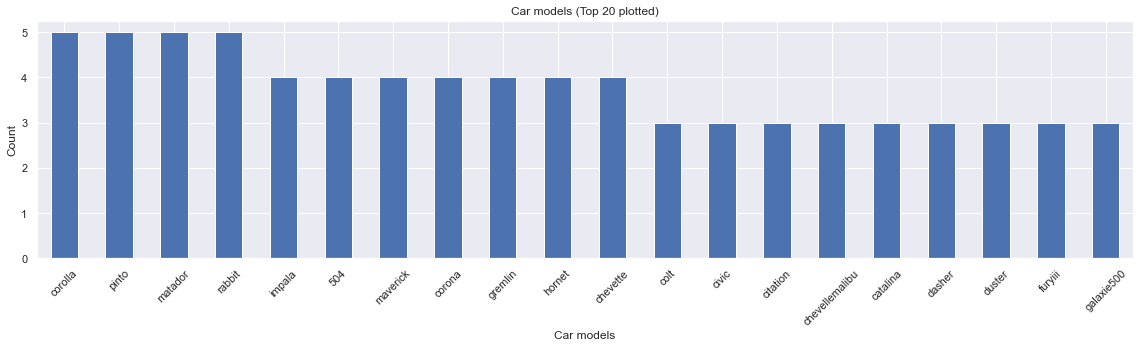

In [44]:
print(f"{data_3.model.nunique()} car models (Top 10)")
print(tabulate(pd.DataFrame(data_3.model.value_counts()[:10])))

plt.figure(figsize=(16,5));
data_3.groupby("model")["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Car models (Top 20 plotted)")
plt.ylabel("Count")
plt.xlabel("Car models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id='Multivariate_Analysis'></a>
## 4.2 Multivariate Analysis

**1. Analysis of kilometer_per_liter with horsepower**

In [45]:
x = data_3[['Kilometer_per_liter','horsepower']]
sns.jointplot(x.loc[:,'horsepower'], x.loc[:,'Kilometer_per_liter'], kind="regg", color="#ce1414")


c:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: `kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], but regg was passed.`

**We can see from the plot that as horsepower increase Kilpmeter_per_liter decreases.**

**2. Analysis of kilometer_per_liter with weight**

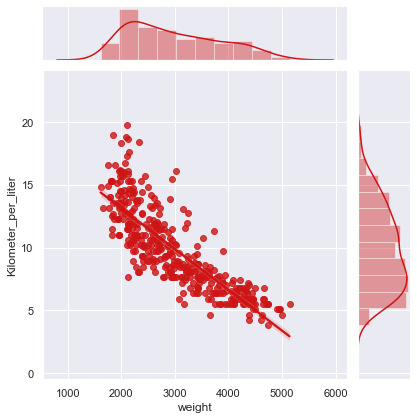

In [ ]:
x = data_3[['Kilometer_per_liter','weight']]
sns.jointplot(x.loc[:,'weight'], x.loc[:,'Kilometer_per_liter'], kind="regg", color="#ce1414")


**3. Analysis of kilometer_per_liter with accleration**

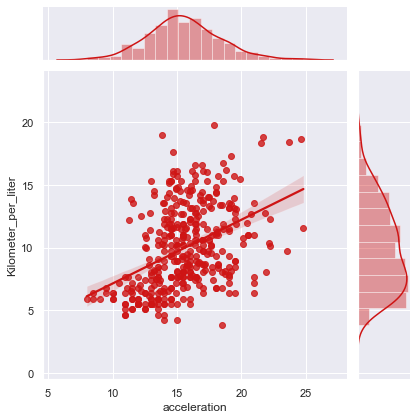

In [ ]:
x = data_3[['Kilometer_per_liter','acceleration']]
sns.jointplot(x.loc[:,'acceleration'], x.loc[:,'Kilometer_per_liter'], kind="regg", color="#ce1414")


**4. Analysis of kilometer_per_liter with displacement**

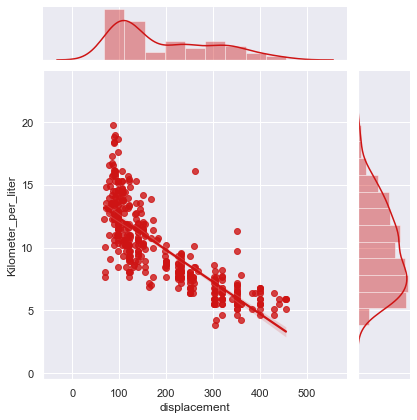

In [ ]:
x = data_3[['Kilometer_per_liter','displacement']]
sns.jointplot(x.loc[:,'displacement'], x.loc[:,'Kilometer_per_liter'], kind="regg", color="#ce1414")


**From plot we can see a inverse relationship**

**5. Analysis of kilometer_per_liter with cylinders**

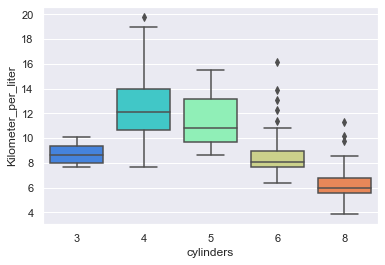

In [ ]:
sns.boxplot(y='Kilometer_per_liter',x='cylinders',data=data_3,palette = "rainbow")
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.</b>     </font>
            </div>
        </td>
    </tr>
</table>

**6. Analysis of kilometer_per_liter with year**

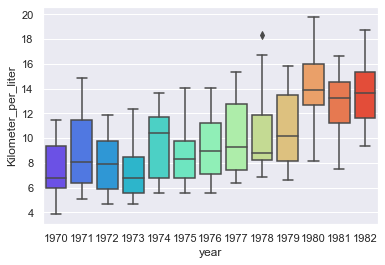

In [ ]:
sns.boxplot(y='Kilometer_per_liter',x='year',data=data,palette = "rainbow")
plt.show()


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>With every year and with the newer models of the vehicles mileage per gallon (mpg) also increases.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Covariance'></a>
## 4.3 Covariance

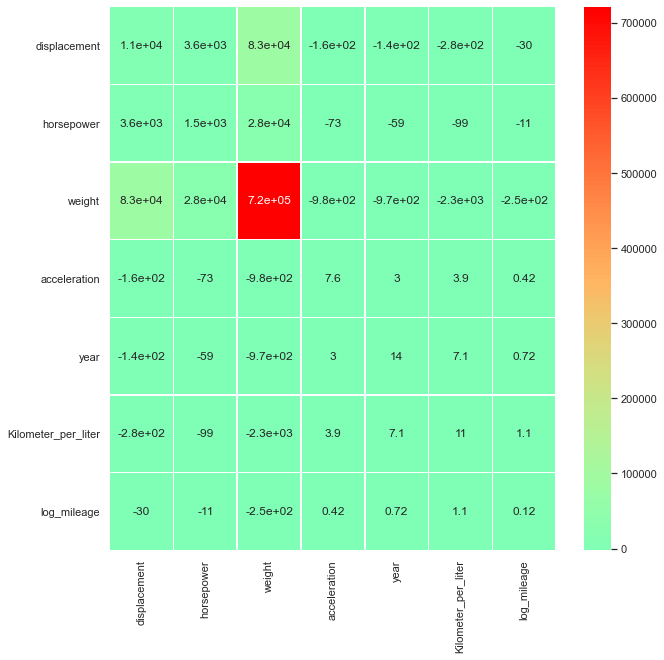

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_3.cov(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>A positive covariance means that asset returns move together while a negative covariance means they move inversely.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Correlation'></a>
## 4.4 Correlation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Call the corr() function which will return the correlation matrix of numeric variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# check correlation
data_num = data_3.drop(['Kilometer_per_liter','log_mileage','origin'],axis = 1)
corr = data_num.corr()
corr

,displacement,horsepower,weight,acceleration,year
displacement,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<AxesSubplot:>

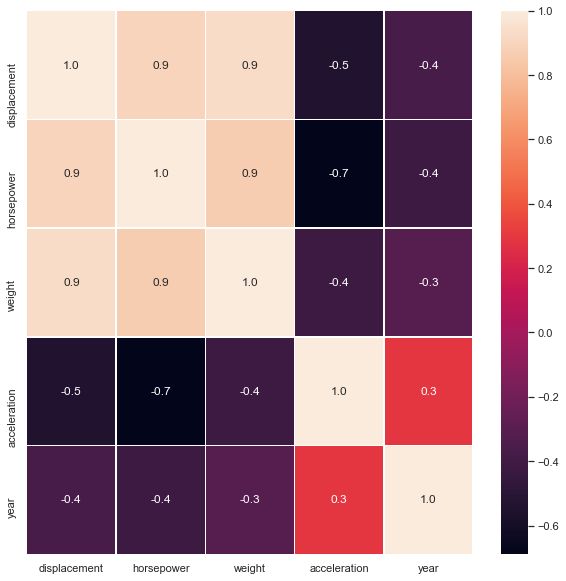

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

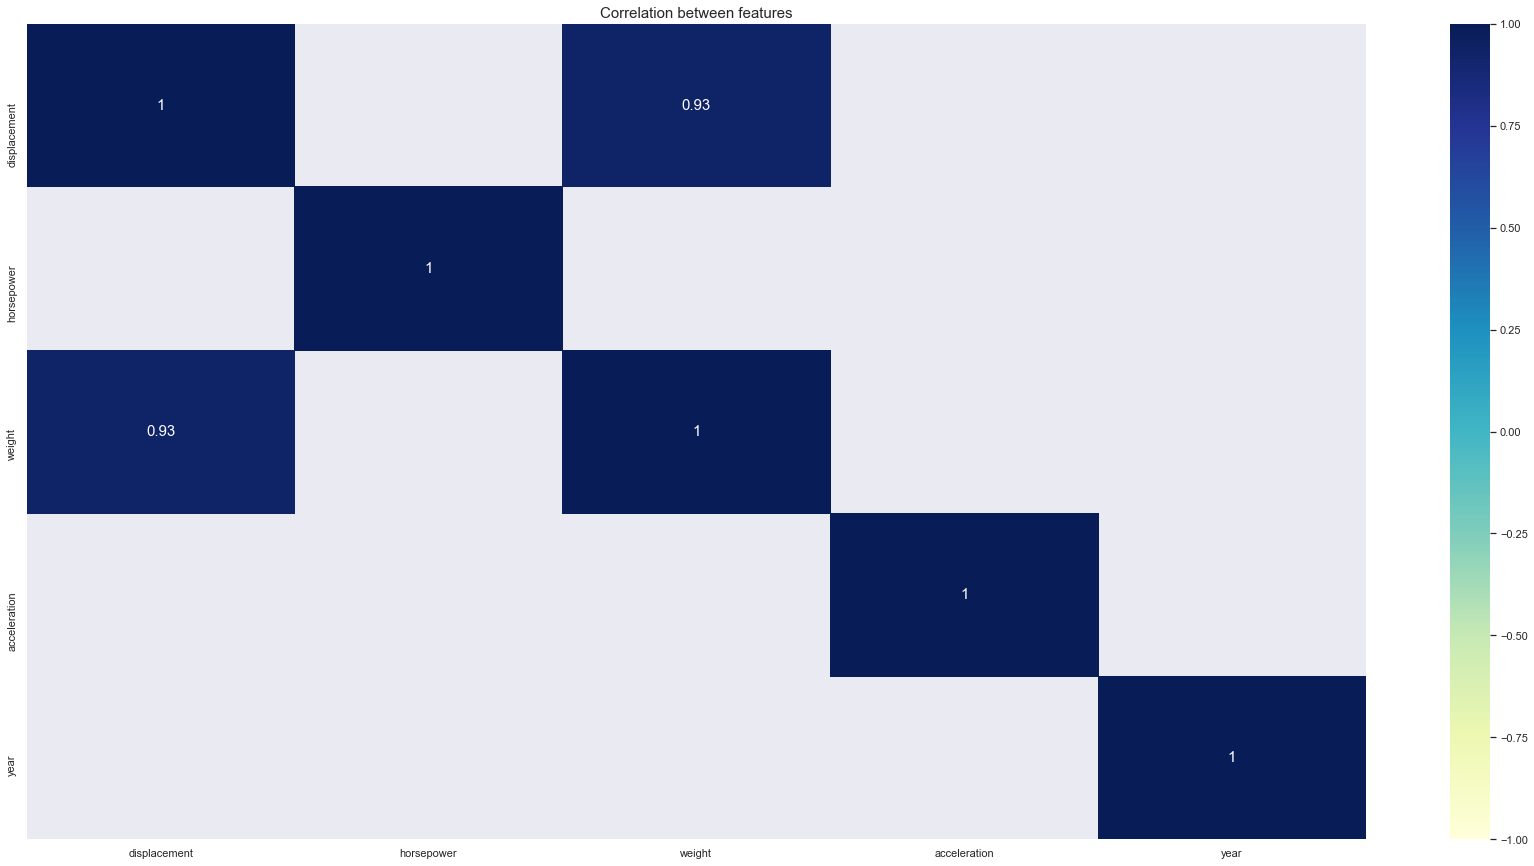

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

plt.title('Correlation between features', fontsize=15)

plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>By looking at the correlation matrix we can see that variables 'displacement','weight' and 'horse' have a strong positive correlation with each other. These feature pairs are strongly correlated to each other. Ideally, we should not select these features together for training the model. </b>     </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
drop_list = ['weight','displacement','manufacturer', 'model']
data_cleaned = data_3.drop(drop_list,axis = 1 )        
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   horsepower           392 non-null    float64
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   Kilometer_per_liter  392 non-null    float64
 6   log_mileage          392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 34.5+ KB


In [ ]:
# print the name of columns
data_cleaned.columns

Index(['origin', 'cylinders', 'horsepower', 'acceleration', 'year',
       'Kilometer_per_liter', 'log_mileage'],
      dtype='object')

<a id="Label_Encoding_of_Categorical_Data"> </a>
## 5. Label Encoding of Categorical Data

In [ ]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies.head()

,horsepower,acceleration,year,Kilometer_per_liter,log_mileage,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,0,0,0,0,0,1


<a id="Standardise_Data"> </a>
## 6. Standardise Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x = data_with_dummies.drop(['Kilometer_per_liter','log_mileage'],axis = 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
y = data_with_dummies.log_mileage

**Split data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (313, 9)
X_test  (79, 9)
y_train  (313,)
y_test  (79,)


<a id="Linear_Regression"> </a>
## 7. Linear Regression

<a id="Ordinary_Least_Square"> </a>
## 7.1 Ordinary Least Square

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a Linear regression model. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a Linear regression model, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [ ]:
from sklearn.linear_model import LinearRegression
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, y_train)


LinearRegression()

**2. Predict the values**

In [ ]:
# predict the values
y_pred_OLS = OLS_model.predict(X_test)

**Before we compute accuracy let's plot the predicted values**

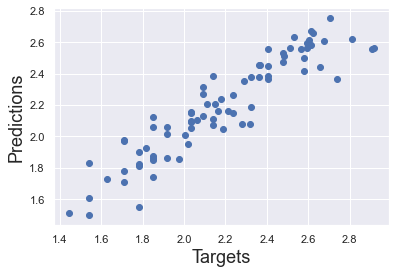

In [ ]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Our model fit well to some extent</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**3. Compute accuracy measures**

In [ ]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test, y_pred_OLS))



**4. Tabulate the results**

In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', ''R-squared', 'Adj R-squared', 'RMSE'

# create a list of column names
cols = ['Model', 'R-squared', 'Adj R-squared', 'RMSE']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
OLS_metrics = pd.Series({'Model': "OLS",
                 'R-squared' : r_squared_OLS, 'Adj R-squared' : Adj_r_squared_OLS , 'RMSE' :rmse_OLS})



# appending our result table
result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.86382,0.859775,0.135834


<a id="Linear_Regression_using_SGD"> </a>
## 7.2 Linear Regression using SGD

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a Linear regression model using SGD Regressor. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to build a Linear regression model using SGD Regressor, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [ ]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000)

# fit the model
SGD_model.fit(X_train, y_train)

SGDRegressor(alpha=0.1)

**2. Make Predictions**

In [ ]:
# predict the values
y_pred_SGD  = SGD_model.predict(X_test)

Before we compute accuracy let's plot the predicted values

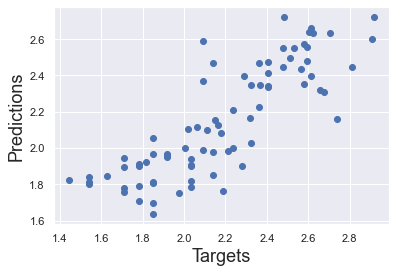

In [ ]:
plt.scatter(y_test,y_pred_SGD)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

**3. Compute accuracy measures**

In [ ]:
# compute the R-Squared
r_squared_SGD = SGD_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(y_test, y_pred_SGD))



**4. Tabulate the results**

In [ ]:
# compiling the required information
SGD_metrics = pd.Series({'Model': "SGD",
                 'R-squared' : r_squared_SGD, 'Adj R-squared' : Adj_r_squared_SGD , 'RMSE' :rmse_SGD})



# appending our result table
result_tabulation = result_tabulation.append(SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.863820,0.859775,0.135834
1,SGD,0.727494,0.719399,0.198799


<a id="model_cmp"> </a>
## 5. Model Comparision

In [ ]:
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.863820,0.859775,0.135834
1,SGD,0.727494,0.719399,0.198799


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>It can be seen from the result tabulation, that accuracy measures for the OLS is better than SGD. </b>
                </font>
            </div>
        </td>
    </tr>
</table>